In [6]:
using Gadfly
include("benchmark.jl");

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/yebai/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/yebai/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/yebai/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/yebai/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [7]:
# Define models to be evaluated
# models = ["anglican_gaussian", "anglican_hmm", "anglican_crp"]; # Branching seems broken
models = ["anglican_crp"]; # Branching seems broken

1-element Array{ASCIIString,1}:
 "anglican_crp"

In [8]:
# Evaluation setup
n_repeat = 5;
ns = [100];

In [9]:
results = Dict();
for m = models
    for n = ns
        srand(1);
        results[(m,n)] = multibenchmark(n_repeat, m, SMC(n))
    end
end

[1,2,22,37,43,1,1,1,1,1]


LoadError: LoadError: UndefVarError: kl_divergence not defined
while loading In[9], in expression starting on line 2

In [10]:
println("times: ")
for m = models
    println("\t", m, ": ")
    for n = ns
        t,s = results[(m,n)][:time]
        println("\t\t", n, ": ", t, " +- ", s , " s")
    end
end

times: 
	anglican_crp: 


LoadError: LoadError: KeyError: ("anglican_crp",100) not found
while loading In[10], in expression starting on line 2

In [11]:
plots = Dict();
for m = models
    kls = map(n -> results[(m,n)][:KL], ns)
    means = map(x -> x[1], kls)
    sds = map(x -> x[2], kls)
    plots[m] = plot(x = ns, y = means, ymin = max(means - sds, 0.5^10), ymax = means + sds, Scale.x_log10, Scale.y_log2,
     Geom.point, Geom.errorbar, Guide.xlabel("Particles"), Guide.ylabel("KL"), Guide.title(m))
end

LoadError: LoadError: KeyError: ("anglican_crp",100) not found
while loading In[11], in expression starting on line 2

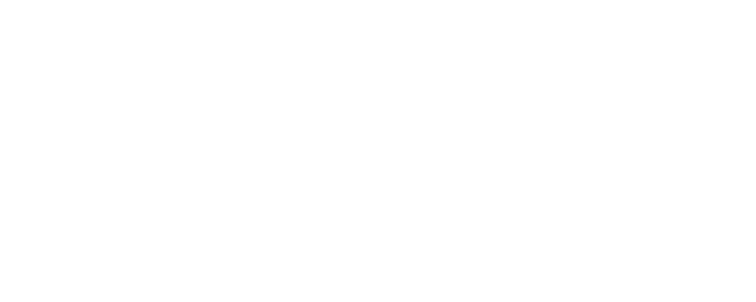

In [7]:
set_default_plot_size(20cm, 8cm)
hstack(collect(values(plots))...)